#  Compound interest

This demo simulates compound interest.
<img src = 'diagram.png'> <br>
$u[k]$: The deposits and withdrawals from the bank account <br>
$x[k]$: The current balance of the bank account(before deposit and interest) <br>
$y[k]$: The acquired interest of that year <br>
$x[k+1]$: The 'next year' balance of the bank account  = current balance + interest + deposits - withdrawals <br>

In [1]:
import numbers
r = None
# Blijf vragen totdat correcte input krijgt
while not (isinstance(r,numbers.Real) and r>=0 and r<=1):
    r = raw_input("Enter the interest rate(as floating point number): ")
    try:
        r = float(r)
    except:
        pass

Enter the interest rate(as floating point number): 0.1


Enter this year input: 50


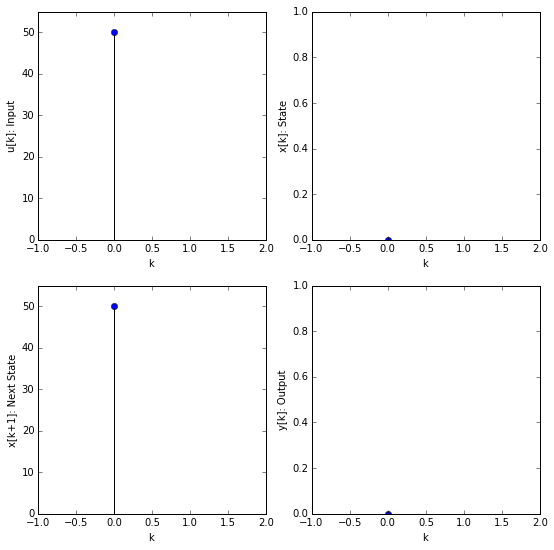

Do you want to keep going(Y/N)? Y
Enter this year input: -100
You can not go benneath 0
Enter this year input: 50


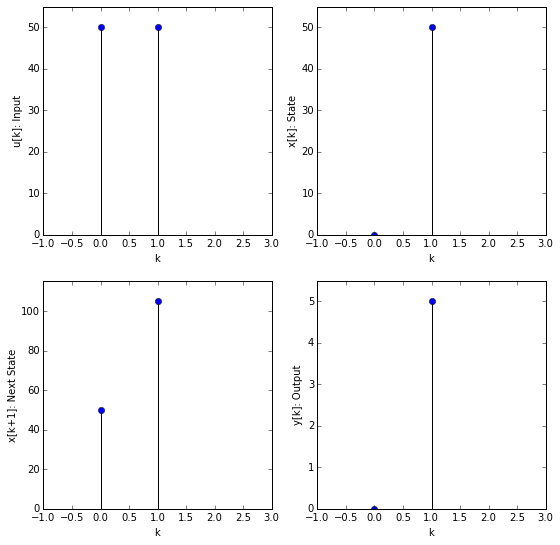

In [ ]:
%matplotlib inline
import numbers
import matplotlib.pyplot as plt
# Teken de horizontale lijnen,pas hoogte aan en benoem x-as
def generate_hlines(values):
        for k in range(len(values)):
            plt.vlines([k],0,values[k])
        plt.plot(range(len(values)),values,'o')
        plt.xlim( -1, len(values)+1) 
        plt.ylim(0,max((max(values))*1.1,1))
        plt.xlabel("k")
# Maak voor iedere variabele staafdiagram
def generate_result(values_u,values_x,values_x1,values_y):
    plt.subplot(2,2,1)
    generate_hlines(values_u)
    plt.ylabel("u[k]: Input")
    plt.subplot(2,2,2)
    generate_hlines(values_x)
    plt.ylabel("x[k]: State")
    plt.subplot(2,2,3)
    generate_hlines(values_x1)
    plt.ylabel("x[k+1]: Next State")
    plt.subplot(2,2,4)
    generate_hlines(values_y)
    plt.ylabel("y[k]: Output")
    fig = plt.gcf()
    fig.set_size_inches(9, 9)
    plt.show()
    
going = True
y_k = [0.0]
x_k = [0.0]
u_k = []
x_k_1 = []
#Zolang de user wil doorgaan, blijf going
while going:
    current_u_k = None
    correct = False
    # blijf vragen tot correcte input
    while not (isinstance(current_u_k,numbers.Real) and correct):
        current_u_k = raw_input("Enter this year input: ")
        try:
            current_u_k = float(current_u_k)
        except:
            print "Make sure the input is a number"
        if (x_k[-1] + current_u_k)>=0:
            correct = True
        else:
            print "You can not go benneath 0"
    u_k.append(current_u_k)
    # Bereken next year value
    x_k_1.append(u_k[-1] + (1 + r) * x_k[-1])
    # Teken resultaat
    generate_result(u_k,x_k,x_k_1,y_k)
    keep_going = None
    # Blijf prompten tot correcte input
    while keep_going != "Y" and keep_going !="N":
        keep_going = raw_input("Do you want to keep going(Y/N)? ")
    if keep_going == "N":
        going = False
    else:
        x_k.append(x_k_1[-1])
        y_k.append(r*x_k[-1])